In [1]:
library(tidyverse)
library(vroom)
library(cowplot)
library(wesanderson)
library(scales)
library(waffle)
library(hrbrthemes)
library(patchwork)
library(yarrr)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘scales’


The following object is masked from ‘package:vroom’:

    col_factor


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:



In [2]:
data_path<-"../data/"
raw_data <-vroom(paste0(data_path, "hfea-ivf.csv"))
full_data <-raw_data %>% 
            # tidy age groups
            mutate(`Patient Age at Treatment`= gsub(" ", "", `Patient Age at Treatment`) ) %>% 
            # update year cols
            mutate(years=ifelse(source == "data/raw_data/ar-2010-2014-xlsb", '2010-2014',
                         ifelse(source == "data/raw_data/ar-1995-1999-xlsb", '1995-1999',
                         ifelse(source == "data/raw_data/ar-2000-2004-xlsb", '2000-2004',
                         ifelse(source == "data/raw_data/ar-1991-1994-xlsb", '1991-1994',
                         ifelse(source == "data/raw_data/ar-2015-2016-xlsb", '2015-2016',
                         ifelse(source == "data/raw_data/ar-2005-2009-xlsb", '2005-2009', 
                         NA))))))) 
                
dim(full_data)
full_data %>% count(years) %>% arrange(years)

Rows: 1,376,454
Columns: 96
Delimiter: ","
chr [22]: Patient Age at Treatment, Total Number of Previous cycles, Both IVF and DI, Tota...
dbl [56]: Date patient started trying to become pregnant OR date of last pregnancy, Total ...
lgl [18]: PGD treatment, PGS, PGS Treatment, Date of Egg Thawing, Heart One Birth Congenit...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message



[1] 1376454      97

years,n
<chr>,<int>
1991-1994,152825
1995-1999,235614
2000-2004,227284
2005-2009,265103
2010-2014,337109
2015-2016,158519


In [3]:
colnames(full_data)

[1] "Patient Age at Treatment"                                                
 [2] "Date patient started trying to become pregnant OR date of last pregnancy"
 [3] "Total Number of Previous cycles, Both IVF and DI"                        
 [4] "Total Number of Previous treatments, Both IVF and DI at clinic"          
 [5] "Total Number of Previous IVF cycles"                                     
 [6] "Total Number of Previous DI cycles"                                      
 [7] "Total number of previous pregnancies, Both IVF and DI"                   
 [8] "Total number of IVF pregnancies"                                         
 [9] "Total number of DI pregnancies"                                          
[10] "Total number of live births - conceived through IVF or DI"               
[11] "Total number of live births - conceived through IVF"                     
[12] "Total number of live births - conceived through DI"                      
[13] "Type of Infertility - Female Primary"                                    
[14] "Type of Infertility - Female Secondary"                                  
[15] "Type of Infertility - Male Primary"                                      
[16] "Type of Infertility - Male Secondary"                                    
[17] "Type of Infertility -Couple Primary"                                     
[18] "Type of Infertility -Couple Secondary"                                   
[19] "Cause  of Infertility - Tubal disease"                                   
[20] "Cause of Infertility - Ovulatory Disorder"                               
[21] "Cause of Infertility - Male Factor"                                      
[22] "Cause of Infertility - Patient Unexplained"                              
[23] "Cause of Infertility - Endometriosis"                                    
[24] "Cause of Infertility - Cervical factors"                                 
[25] "Cause of Infertility - Female Factors"                                   
[26] "Cause of Infertility - Partner Sperm Concentration"                      
[27] "Cause of Infertility -  Partner Sperm Morphology"                        
[28] "Causes of Infertility - Partner Sperm Motility"                          
[29] "Cause of Infertility -  Partner Sperm Immunological factors"             
[30] "Main Reason for Producing Embroys Storing Eggs"                          
[31] "Stimulation used"                                                        
[32] "Type of Ovulation Induction"                                             
[33] "Egg Donor Age at Registration"                                           
[34] "Sperm Donor Age at Registration"                                         
[35] "Donated embryo"                                                          
[36] "Patient acting as Surrogate"                                             
[37] "Type of treatment - IVF or DI"                                           
[38] "Specific treatment type"                                                 
[39] "PGD"                                                                     
[40] "PGD treatment"                                                           
[41] "PGS"                                                                     
[42] "PGS Treatment"                                                           
[43] "Elective Single Embryo Transfer"                                         
[44] "Egg Source"                                                              
[45] "Sperm From"                                                              
[46] "Fresh Cycle"                                                             
[47] "Frozen Cycle"                                                            
[48] "Eggs Thawed"                                                             
[49] "Fresh Eggs Collected"                                                    
[50] "Fresh Eggs Stored"                                                       
[

## Plan

I'm going to explore the following categories:

* reasons for enrolment
* types of infertility
* cause of infertility
* types of IVF treatement
  - subtypes
  - how treatment types preference changed over time

### Exploring reasons for enrolment into IVF Registry

Main Reason for Producing Embroys Storing Eggs,n
<chr>,<int>
For Donation,15649
"For Donation ,For Storing Eggs",68
"For Donation ,For Storing Embryos",223
For Research,5
For Storing Eggs,5321
For Storing Embryos,14495
"For Storing Embryos ,For Storing Eggs",13
"For Storing Embryos ,For Storing Eggs ,For Research",1
Reason unassigned,125


Warning message:
“Expected 1 pieces. Additional pieces discarded in 11 rows [2, 3, 7, 8, 11, 12, 13, 14, 15, 16, 17].”


# A tibble: 6 x 3
  main_reason             sum percent
  <chr>                 <int>   <dbl>
1 For Donation          15940   11.6 
2 For Research              5    1   
3 For Storing Eggs       5321    3.87
4 For Storing Embryos   14509   10.5 
5 Reason unassigned    240676  175.  
6 Treatment Now       1100003  799.  


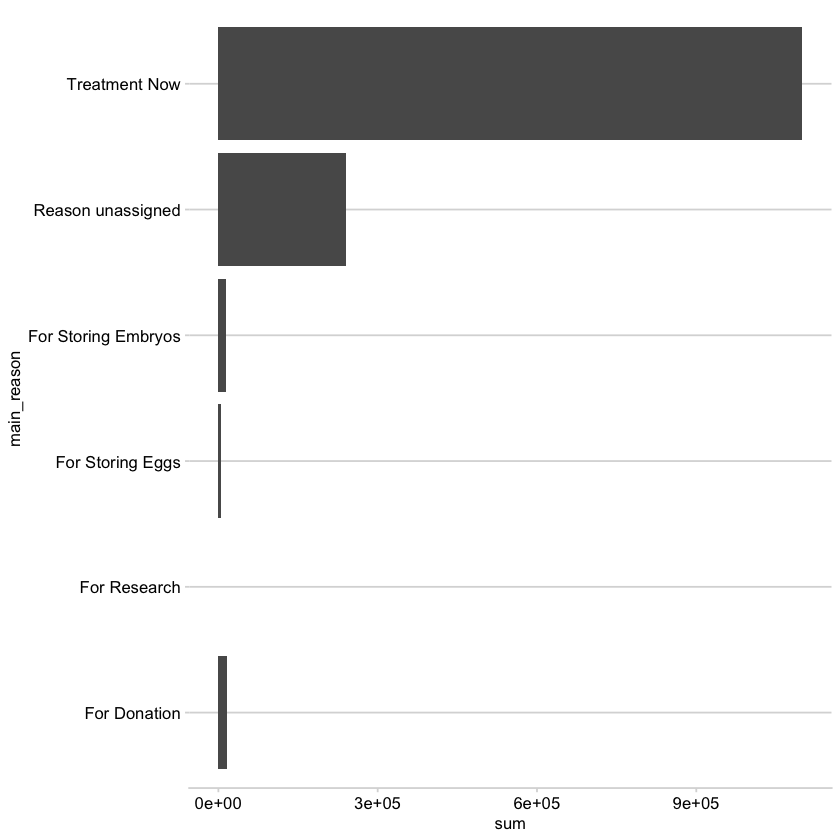

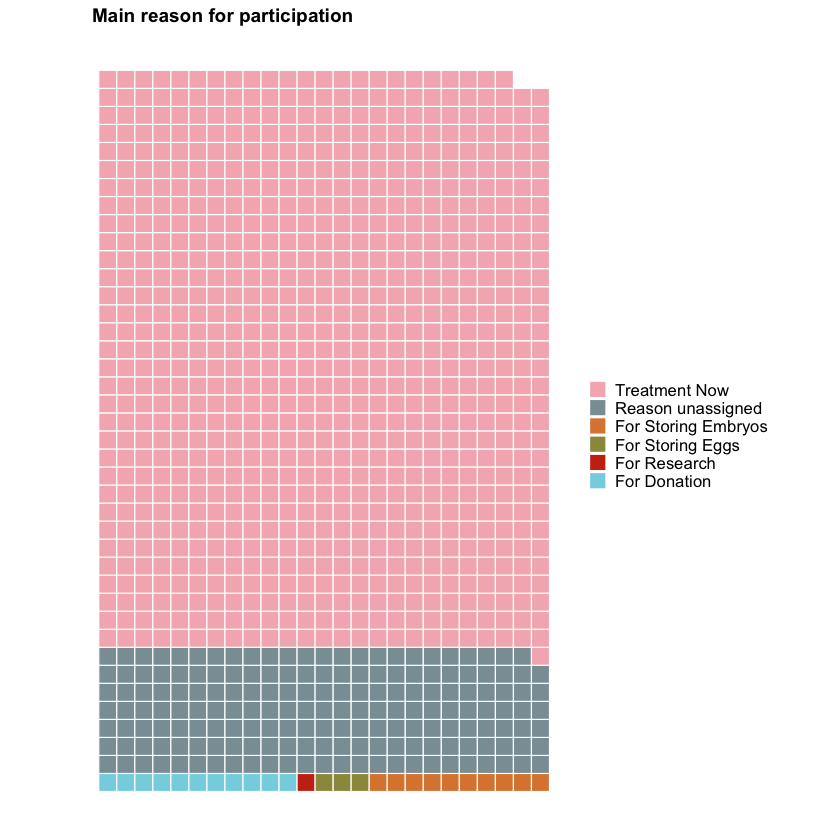

In [4]:
# check partipation reasons
full_data %>% 
  count(`Main Reason for Producing Embroys Storing Eggs`)

# tidy up reason, keeping just the first one
reasons<-full_data %>% 
  count(`Main Reason for Producing Embroys Storing Eggs`) %>% 
  separate(1, into=c("main_reason"),sep=",") %>% 
  mutate(main_reason=str_trim(main_reason, side="right") )%>%  
  mutate(main_reason=ifelse(is.na(main_reason), "Reason unassigned", main_reason)) %>% 
  group_by(main_reason) %>% 
  summarize(sum=sum(n)) 

reasons<-reasons %>% 
  mutate(percent=(sum/sum(reasons$sum))*1000) 
reasons$percent[2]<-1
print(reasons)

# simple bar chart
ggplot(reasons,aes(x = main_reason, y = sum)) + 
  geom_bar(stat="identity")+
  coord_flip()+
  theme_minimal_hgrid(10, rel_small = 1)

pal9<-c(wes_palette("Royal1"), wes_palette("Moonrise3"))
#show_col(pal9)
ggplot(reasons, aes(fill = main_reason, values = percent))+
  geom_waffle(n_rows = 25, size = 0.33, colour = "white", flip = TRUE) +
  coord_equal() +
  theme_minimal_grid(10, rel_small = 1,line_size=0)+
  theme_enhance_waffle()+
  guides(fill = guide_legend(reverse = TRUE))+
  ggtitle("   Main reason for participation")+
  scale_fill_manual(
    name = NULL,
    values = c(pal9[5],pal9[2],pal9[7],pal9[4],pal9[1],pal9[6]),
    labels = c('For Donation',  'For Research',  'For Storing Eggs',
               'For Storing Embryos' ,'Reason unassigned' ,'Treatment Now' )
  ) 

### Showing age groups in a similar way

Patient Age at Treatment,n
<chr>,<int>
18-34,658400
35-37,308121
38-39,179428
40-42,153955
43-44,41760
45-50,23114
999,11676


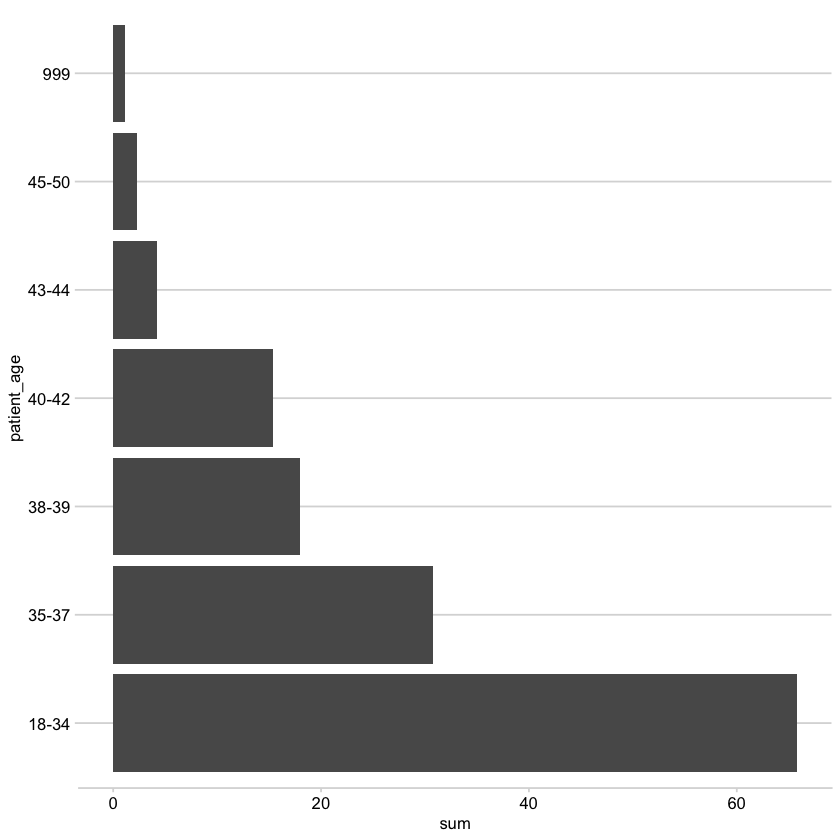

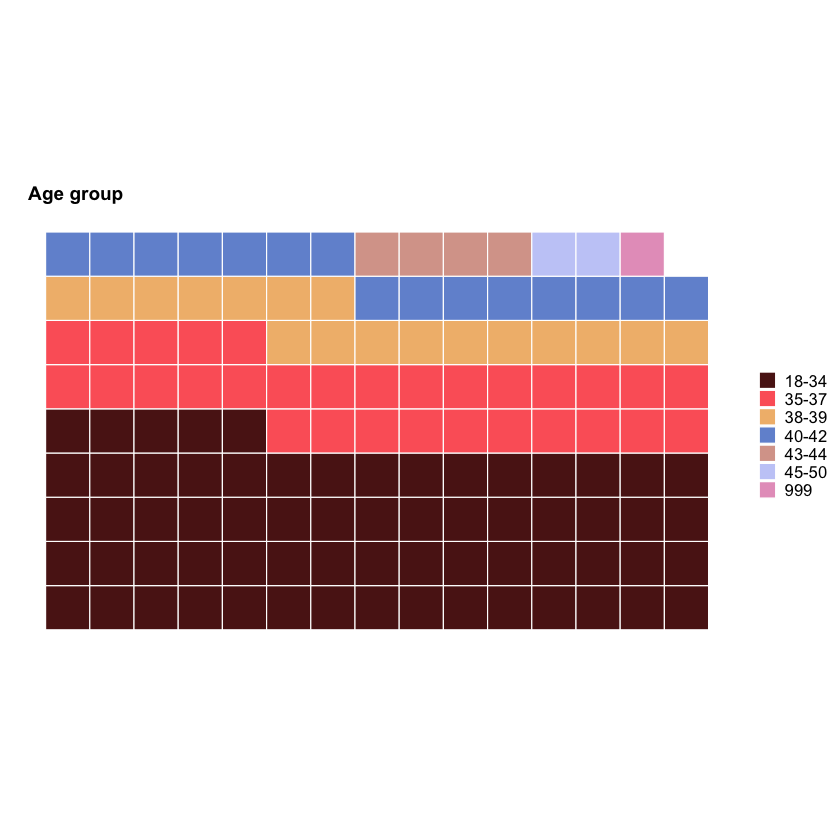

In [5]:

# check partipation reasons
full_data %>% 
  count(`Patient Age at Treatment`)

# tidy up reason, keeping just the first one
age<-full_data %>% 
  mutate(patient_age = gsub(" ", "", `Patient Age at Treatment`) ) %>% 
  count(patient_age) %>% 
  group_by(patient_age) %>% 
  summarize(sum=sum(n)) %>% 
  mutate(sum=sum/10000)


# simple bar chart
ggplot(age,aes(x = patient_age, y = sum)) + 
  geom_col()+
  coord_flip()+
  theme_minimal_hgrid(10, rel_small = 1)

pal_b<-c(wes_palette("GrandBudapest2"), wes_palette("GrandBudapest1"))
#show_col(pal9)
ggplot(age, aes(fill = reorder(patient_age, sum), values = sum))+
  geom_waffle(n_rows = 15, size = 0.33, colour = "white", flip = TRUE) +
  coord_equal() +
  theme_minimal_grid(10, rel_small = 1,line_size=0)+
  theme_enhance_waffle()+
  guides(fill = guide_legend(reverse = TRUE))+
  ggtitle("   Age group")+
  scale_fill_manual(
    name = NULL,
    values = pal_b)

In [6]:
# update dat with clean categories
full_data<-full_data %>% 
  separate(`Main Reason for Producing Embroys Storing Eggs`, 
           into=c("main_reason"),sep=",", remove = F) %>%
  mutate(main_reason=str_trim(main_reason, side="right") )%>%  
  mutate(main_reason=ifelse(is.na(main_reason), "Reason unassigned", main_reason))

# we are only going to look at people who joined specifically for treatment, with known age
dat<-full_data %>% 
      filter(main_reason == 'Treatment Now') %>% 
      filter(`Patient Age at Treatment` != '999')

Warning message:
“Expected 1 pieces. Additional pieces discarded in 16405 rows [8305, 8309, 8365, 8415, 8471, 8617, 8622, 8708, 8786, 8790, 9181, 9201, 9205, 9232, 9253, 9365, 9401, 9483, 9502, 9565, ...].”



### Exploring types of infertility

Infertility is usually only diagnosed when a couple have not managed to conceive after a year of trying.

There are 2 types of infertility:

* **primary infertility** – where someone who's never conceived a child in the past has difficulty conceiving
* **secondary infertility **– where someone has had 1 or more pregnancies in the past, but is having difficulty conceiving again

*From: https://www.nhs.uk/conditions/infertility/*


In [7]:
# get columsn for types of infertility
cols<-colnames(dat)[grepl("Type of Inf", colnames(dat))]
print(cols)
subset1<-dat %>% select(`Patient Age at Treatment`, cols) 
colnames(subset1)<-str_replace(colnames(subset1), "Type of Infertility -", "") %>%
                  str_trim(., side="both") 

print(subset1[398:406,2:7])

# convert dat to long format 
subset1_tidy<- subset1 %>% 
          pivot_longer(2:7, 
                    names_to = "type_of_infertility",
                    values_to = "binary") %>% 
              filter(binary == 1) %>% 
             # add partner categories
              mutate(partner=ifelse(grepl("Female", type_of_infertility), "Female",
                              ifelse(grepl("Male", type_of_infertility), "Male",
                              ifelse(grepl("Couple", type_of_infertility), "Couple",0))))
head(subset1_tidy)

[1] "Type of Infertility - Female Primary"  
[2] "Type of Infertility - Female Secondary"
[3] "Type of Infertility - Male Primary"    
[4] "Type of Infertility - Male Secondary"  
[5] "Type of Infertility -Couple Primary"   
[6] "Type of Infertility -Couple Secondary" 


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(cols)` instead of `cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



# A tibble: 9 x 6
  `Female Primary` `Female Seconda… `Male Primary` `Male Secondary`
             <dbl>            <dbl>          <dbl>            <dbl>
1                0                0              0                0
2                1                0              1                0
3                0                0              0                0
4                0                1              1                0
5                0                0              0                0
6                0                0              0                0
7                0                0              0                0
8                0                0              0                0
9                0                0              0                0
# … with 2 more variables: `Couple Primary` <dbl>, `Couple Secondary` <dbl>


Patient Age at Treatment,type_of_infertility,binary,partner
<chr>,<chr>,<dbl>,<chr>
18-34,Female Primary,1,Female
18-34,Male Primary,1,Male
18-34,Couple Primary,1,Couple
18-34,Female Primary,1,Female
18-34,Male Primary,1,Male
18-34,Couple Primary,1,Couple


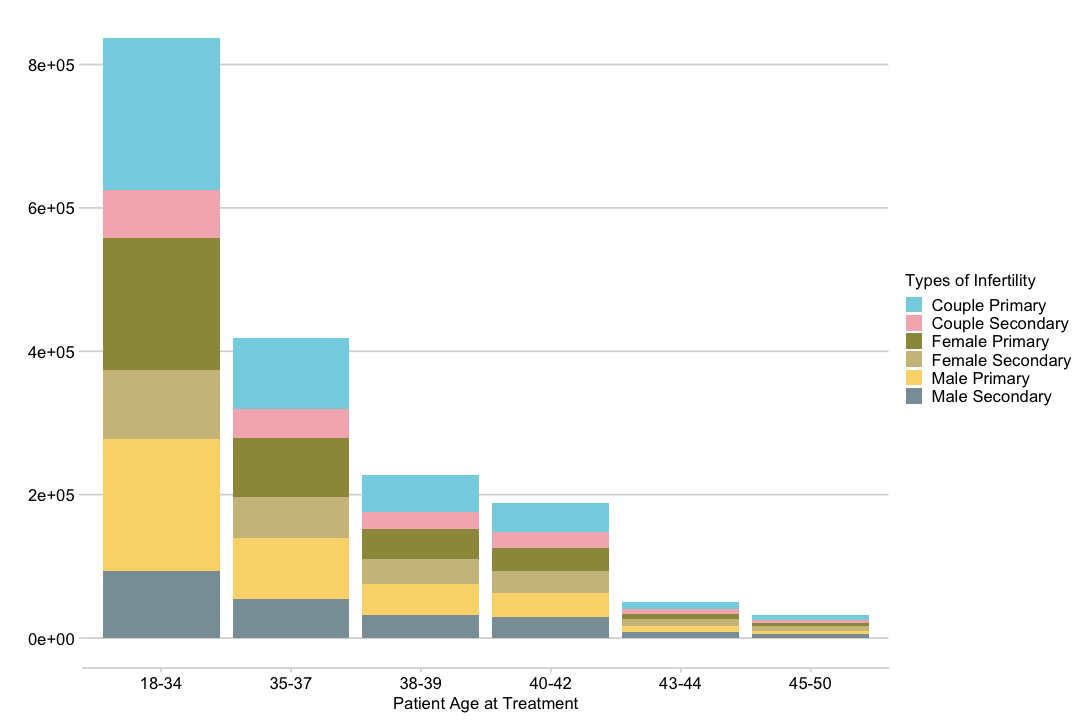

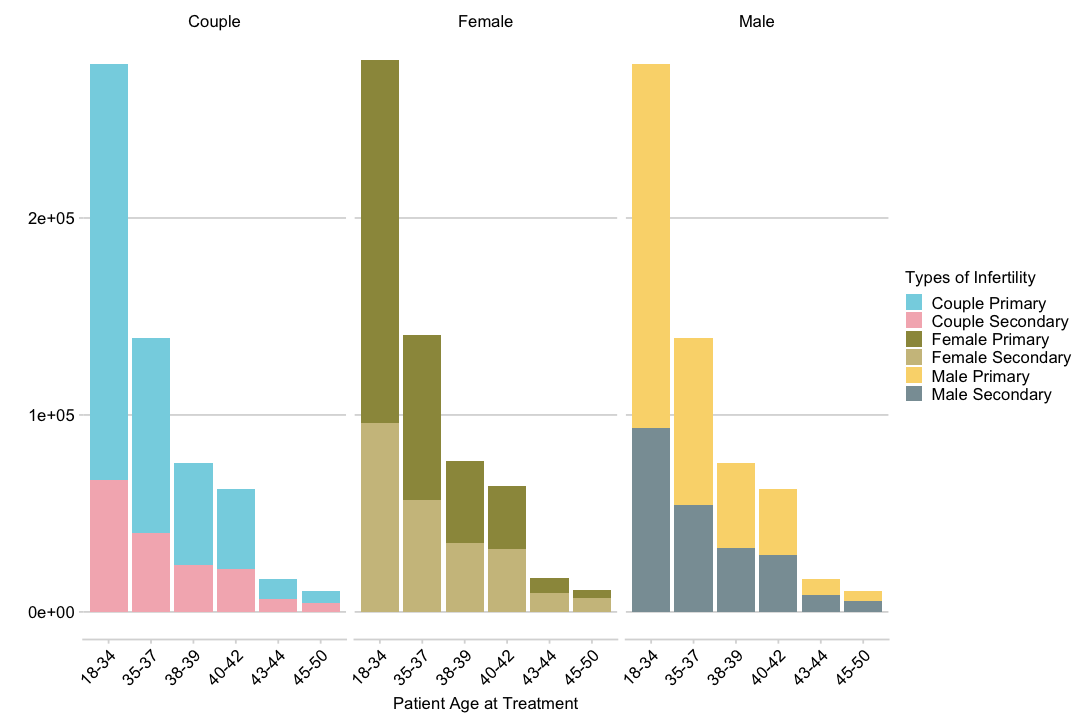

In [8]:
pal <- c(wes_palette("Moonrise3") , wes_palette("Royal1"))
# most basic
options(repr.plot.width=9, repr.plot.height=6)
ggplot(subset1_tidy,aes(x = `Patient Age at Treatment`, fill = type_of_infertility)) + 
  geom_bar()+
  theme_minimal_hgrid(10, rel_small = 1)+
  scale_fill_manual(values=pal)+
  labs(fill = "Types of Infertility", y="")    

# by partner
options(repr.plot.width=9, repr.plot.height=6)
ggplot(subset1_tidy,aes(x = `Patient Age at Treatment`, fill = type_of_infertility)) + 
  geom_bar()+
  theme_minimal_hgrid(10, rel_small = 1)+
  facet_wrap(~partner, nrow=1)+
  scale_fill_manual(values=pal)+
  labs(fill = "Types of Infertility", y="") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Patient Age at Treatment,type_of_infertility,binary,partner,count
<chr>,<chr>,<dbl>,<chr>,<int>
18-34,Female Primary,1,Female,184580
18-34,Male Primary,1,Male,184761
18-34,Couple Primary,1,Couple,211229
35-37,Female Primary,1,Female,83370
35-37,Male Primary,1,Male,84733
35-37,Couple Primary,1,Couple,98752


       18-34  35-37  38-39  40-42 43-44 45-50
total 836549 418337 228004 188296 49990 31957


Patient Age at Treatment,type_of_infertility,binary,partner,count,age_group_percent
<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>
18-34,Female Primary,1,Female,184580,0.2206446
18-34,Male Primary,1,Male,184761,0.2208609
18-34,Couple Primary,1,Couple,211229,0.2525005
35-37,Female Primary,1,Female,83370,0.1992891
35-37,Male Primary,1,Male,84733,0.2025472
35-37,Couple Primary,1,Couple,98752,0.2360585


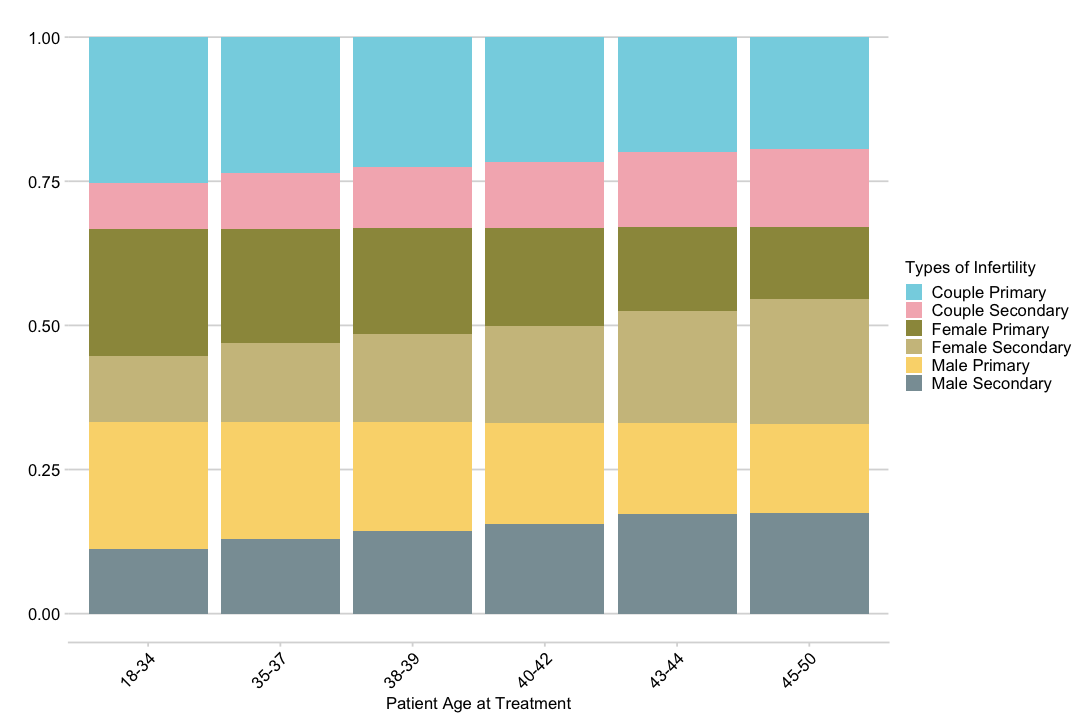

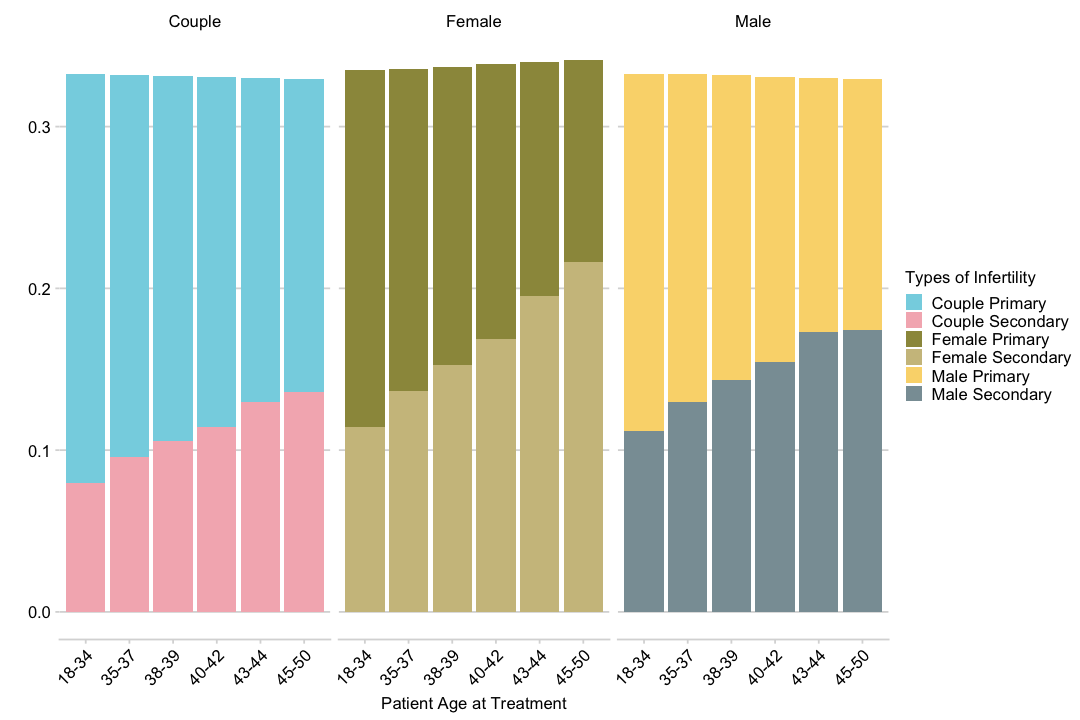

In [9]:
# then I decided to convert each group into percentage

# create counts by group 
subset1_tidy2<- subset1_tidy %>% 
                group_by(`Patient Age at Treatment`, type_of_infertility) %>%         
                mutate(count = n()) %>%
                distinct() %>% 
                ungroup()
head(subset1_tidy2)

# calulate sums per age
age_counts<-subset1_tidy2 %>%
  select(`Patient Age at Treatment`, count) %>% 
  group_by(`Patient Age at Treatment`) %>% 
  summarize(total = sum(count)) %>%
  ungroup() %>% 
  column_to_rownames("Patient Age at Treatment") %>% 
  t() %>% as.data.frame()
print(age_counts)  

subset1_tidy2<-subset1_tidy2 %>% 
    mutate(age_group_percent= ifelse(`Patient Age at Treatment` == "18-34", count/age_counts$`18-34`,
                              ifelse(`Patient Age at Treatment` == "35-37", count/age_counts$`35-37`,
                              ifelse(`Patient Age at Treatment` == "38-39", count/age_counts$`38-39`,
                              ifelse(`Patient Age at Treatment` == "40-42", count/age_counts$`40-42`,
                              ifelse(`Patient Age at Treatment` == "43-44", count/age_counts$`43-44`,
                              ifelse(`Patient Age at Treatment` == "45-50", count/age_counts$`45-50`, NA)))))))
head(subset1_tidy2)

# now can definitely see the conncetion of age + primary/secondary 
pal <- c(wes_palette("Moonrise3") , wes_palette("Royal1"))

# 100 % by age group 
options(repr.plot.width=9, repr.plot.height=6)
ggplot(subset1_tidy2,aes(x = `Patient Age at Treatment`, y=age_group_percent, fill = type_of_infertility)) + 
  geom_bar(stat = "identity")+
  theme_minimal_hgrid(10, rel_small = 1)+
  scale_fill_manual(values=pal)+
  #facet_wrap(~partner, nrow=1)+
  labs(fill = "Types of Infertility", y="")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# stratigy by gender
ggplot(subset1_tidy2,aes(x = `Patient Age at Treatment`, y=age_group_percent, fill = type_of_infertility)) + 
  geom_bar(stat = "identity")+
  theme_minimal_hgrid(10, rel_small = 1)+
  scale_fill_manual(values=pal)+
  facet_wrap(~partner, nrow=1)+
  labs(fill = "Types of Infertility", y="")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

[1] "Female Primary"   "Female Secondary" "Male Primary"     "Male Secondary"

Patient Age at Treatment,types,count
<chr>,<chr>,<int>
38-39,0/0/0/0,75896
18-34,0/0/0/0,221938
40-42,0/0/0/0,67172
18-34,1/0/1/0,161191
35-37,0/0/0/0,115451
43-44,0/0/0/0,18835


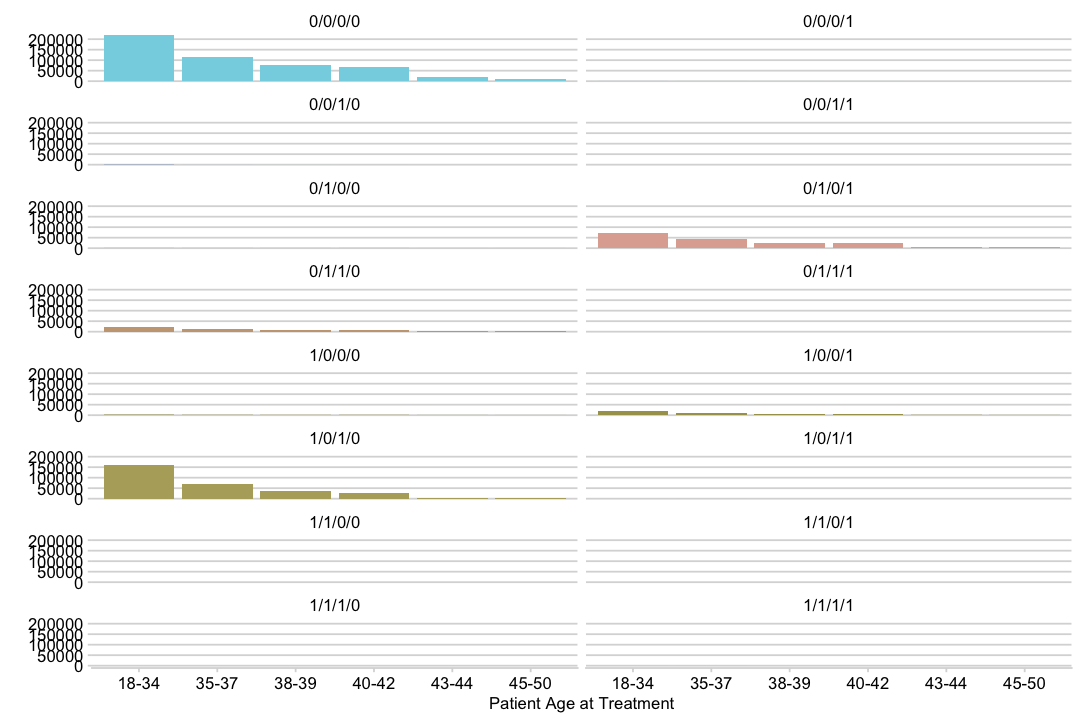

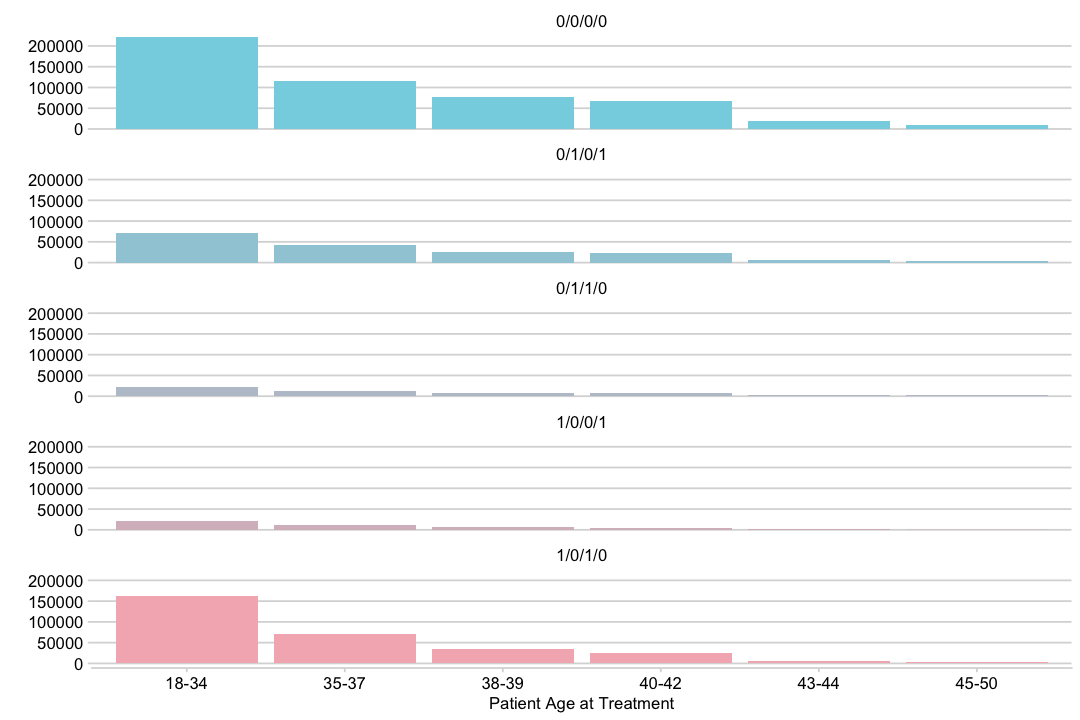

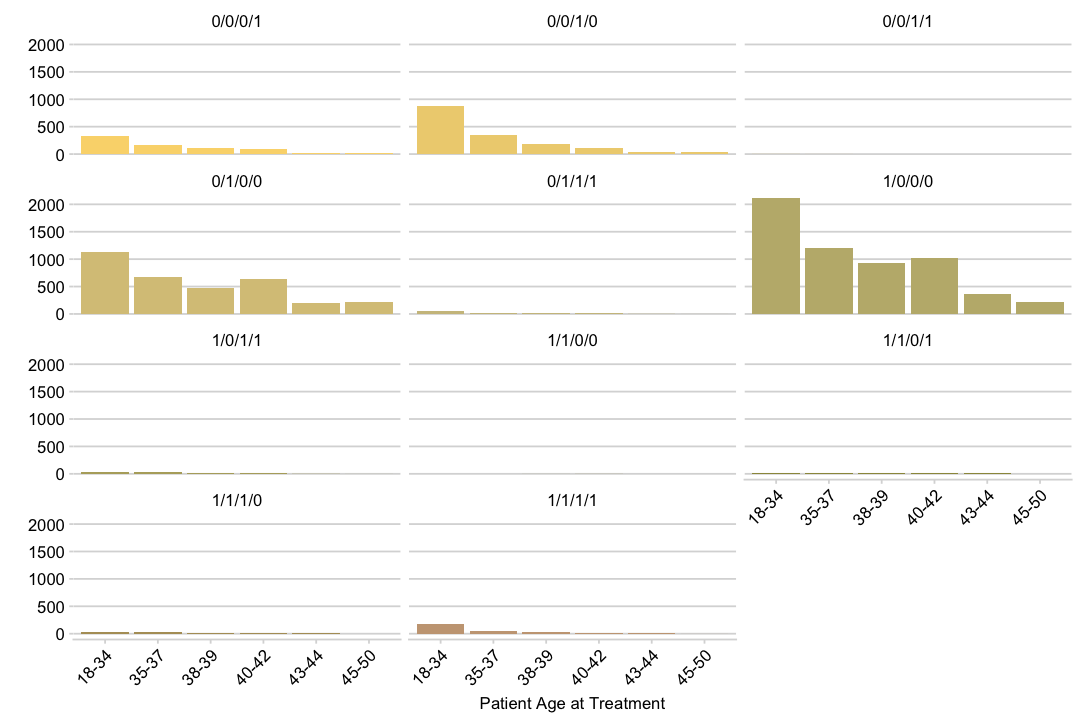

In [10]:
# anyway now going to focus on male and female infertiliry only  

subset1_grouped <- subset1 %>% 
                select(1:5) %>% # keep female and male
                unite("types", 2:5,  sep="/" ) %>%  # group them into one column of binary 0/1
                group_by(`Patient Age at Treatment`, types) %>%         
                mutate(count = n()) %>%
                distinct() %>% ungroup()

colnames(subset1)[2:5]
head(subset1_grouped)


pal_cont <- wes_palette("Moonrise3", 17, type = "continuous")
#show_col(pal_cont)
ggplot(subset1_grouped,aes(x = `Patient Age at Treatment`, y= count, fill = types)) + 
  geom_bar(stat = "identity")+
  theme_minimal_hgrid(10, rel_small = 1)+
  facet_wrap(~types, nrow=10)+
  theme(legend.position = "none")+
  scale_fill_manual(values=pal_cont)+
  labs(fill = "Combination of infertily factors", y="")+
  guides(fill=guide_legend(ncol=1))

# count by type
subset1_grouped_counts<-subset1_grouped %>% 
              group_by( types) %>% 
              summarize(total = sum(count)) %>%
              ungroup() %>% 
              arrange(desc(total))

# look at most common types closer  
types_sub<-subset1_grouped_counts %>% filter(total >40000) %>% pull(types)
subset1_grouped %>% filter(types %in% types_sub)  %>% 
  ggplot(aes(x = `Patient Age at Treatment`, y= count, fill = types)) + 
    geom_bar(stat = "identity")+
    theme_minimal_hgrid(10, rel_small = 1)+
    facet_wrap(~types, nrow=5)+
    scale_fill_manual(values=pal_cont)+
    theme(legend.position = "none")+
    labs(fill = "Combination of infertily factors", y="")+
    guides(fill=guide_legend(ncol=1))

# look at the rest closer
types_sub<-subset1_grouped_counts %>% filter(total <40000) %>% pull(types)
subset1_grouped %>% filter(types %in% types_sub)  %>% 
  ggplot(aes(x = `Patient Age at Treatment`, y= count, fill = types)) + 
    geom_bar(stat = "identity")+
    theme_minimal_hgrid(10, rel_small = 1)+
    facet_wrap(~types, nrow=5)+
    theme(legend.position = "none")+
    scale_fill_manual(values=rev(pal_cont))+
    labs(fill = "Combination of infertily factors", y="")+
    guides(fill=guide_legend(ncol=1))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))



#subset1_grouped2 <- subset1 %>% select(1:5) %>% 
#                mutate(female_infertility= ifelse(rowSums(.[2:3]) == 0 , 0 , 1 )) %>% 
#                mutate(male_infertility= ifelse(rowSums(.[4:5]) == 0 , 0 , 1 )) %>% 
#                select(1,6,7) %>% 
#                unite("types", 2:3,  sep="/" ) %>% 
#                group_by(`Patient Age at Treatment`, types) %>%         
#                mutate(count = n()) %>%
#                distinct()
#                  
#
#pal <- c(wes_palette("Moonrise3") , wes_palette("Royal1"))
#pal <- c(wes_palette("Moonrise3")[1:2], wes_palette("Moonrise3")[1:2], wes_palette("Moonrise3")[1:2])
#ggplot(subset1_grouped2,aes(x = `Patient Age at Treatment`, y= count, fill = types)) + 
#  geom_bar(stat = "identity")+
#  theme_minimal_hgrid(10, rel_small = 1)+
#  facet_wrap(~types, nrow=10)+
#  #scale_fill_manual(values=pal)+
#  labs(fill = "Combination of infertily factors", y="")+
#  guides(fill=guide_legend(ncol=1))

### Exploring causes of infertility

 [1] "Cause  of Infertility - Tubal disease"                      
 [2] "Cause of Infertility - Ovulatory Disorder"                  
 [3] "Cause of Infertility - Male Factor"                         
 [4] "Cause of Infertility - Patient Unexplained"                 
 [5] "Cause of Infertility - Endometriosis"                       
 [6] "Cause of Infertility - Cervical factors"                    
 [7] "Cause of Infertility - Female Factors"                      
 [8] "Cause of Infertility - Partner Sperm Concentration"         
 [9] "Cause of Infertility -  Partner Sperm Morphology"           
[10] "Causes of Infertility - Partner Sperm Motility"             
[11] "Cause of Infertility -  Partner Sperm Immunological factors"
# A tibble: 9 x 6
  `Tubal disease` `Ovulatory Diso… `Male Factor` `Patient Unexpl… Endometriosis
            <dbl>            <dbl>         <dbl>            <dbl>         <dbl>
1               0                0             1                0             0
2    

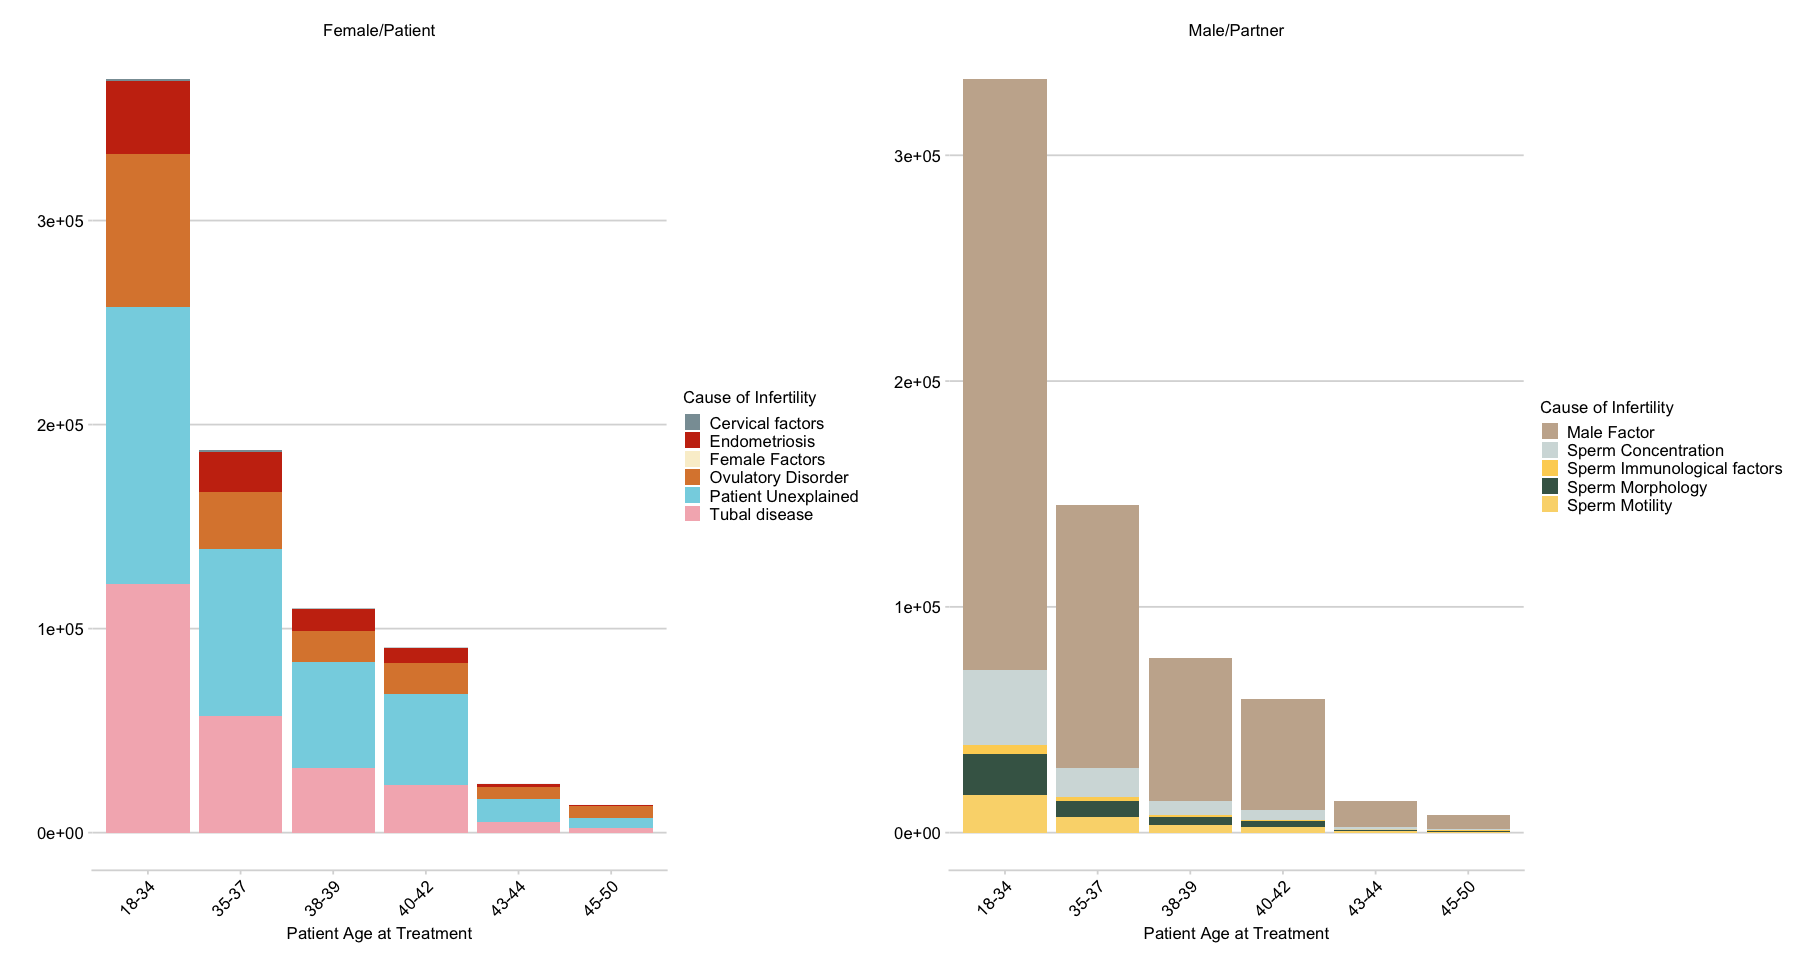

In [11]:

# types of infertility
# get columsn for types of infertility
cols<-colnames(dat)[grepl("Cause", colnames(dat))]
print(cols)
subset2<-dat %>% select(`Patient Age at Treatment`, cols) %>% 
   rename("Cause of Infertility - Tubal disease"="Cause  of Infertility - Tubal disease",
         "Cause of Infertility - Partner Sperm Motility" = "Causes of Infertility - Partner Sperm Motility")
colnames(subset2)<-str_replace(colnames(subset2), "Cause of Infertility - ", "")%>%
                  str_trim(., side="both") 

print(subset2[398:406,2:7])



subset2<- subset2 %>% 
  pivot_longer(2:12, 
               names_to = "cause_of_infertility",
               values_to = "binary") %>%
  filter(binary == 1) %>% 
  mutate(partner=ifelse(grepl("Female", cause_of_infertility), "Female/Patient",
                 ifelse(grepl("Patient", cause_of_infertility), "Female/Patient",
                 ifelse(grepl("Male", cause_of_infertility), "Male/Partner",
                 ifelse(grepl("Partner", cause_of_infertility),"Male/Partner","Female/Patient"))))) %>% 
  mutate(cause_of_infertility=str_replace(cause_of_infertility,"Partner ", ""))

pal <- c(wes_palette("Royal1"), wes_palette("Moonrise3"), wes_palette("Chevalier1"))
p1<-subset2 %>% 
  filter(partner == "Female/Patient") %>% 
  ggplot(aes(x = `Patient Age at Treatment`, fill = cause_of_infertility)) + 
    geom_bar()+
    theme_minimal_hgrid(10, rel_small = 1)+
    scale_fill_manual(values=pal)+
    facet_wrap(~partner, nrow=1)+
    theme(legend.position = "right")+
    labs(fill = "Cause of Infertility", y="")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p2<-subset2 %>% 
  filter(partner == "Male/Partner") %>% 
  ggplot(aes(x = `Patient Age at Treatment`, fill = cause_of_infertility)) + 
    geom_bar()+
    theme_minimal_hgrid(10, rel_small = 1)+
    scale_fill_manual(values=rev(pal))+
    facet_wrap(~partner, nrow=1)+
    theme(legend.position = "right")+
    labs(fill = "Cause of Infertility", y="")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p<-(p1 + p2)
options(repr.plot.width=15, repr.plot.height=8)
p

       18-34  35-37  38-39  40-42 43-44 45-50
total 703111 332386 186954 149978 37980 21480


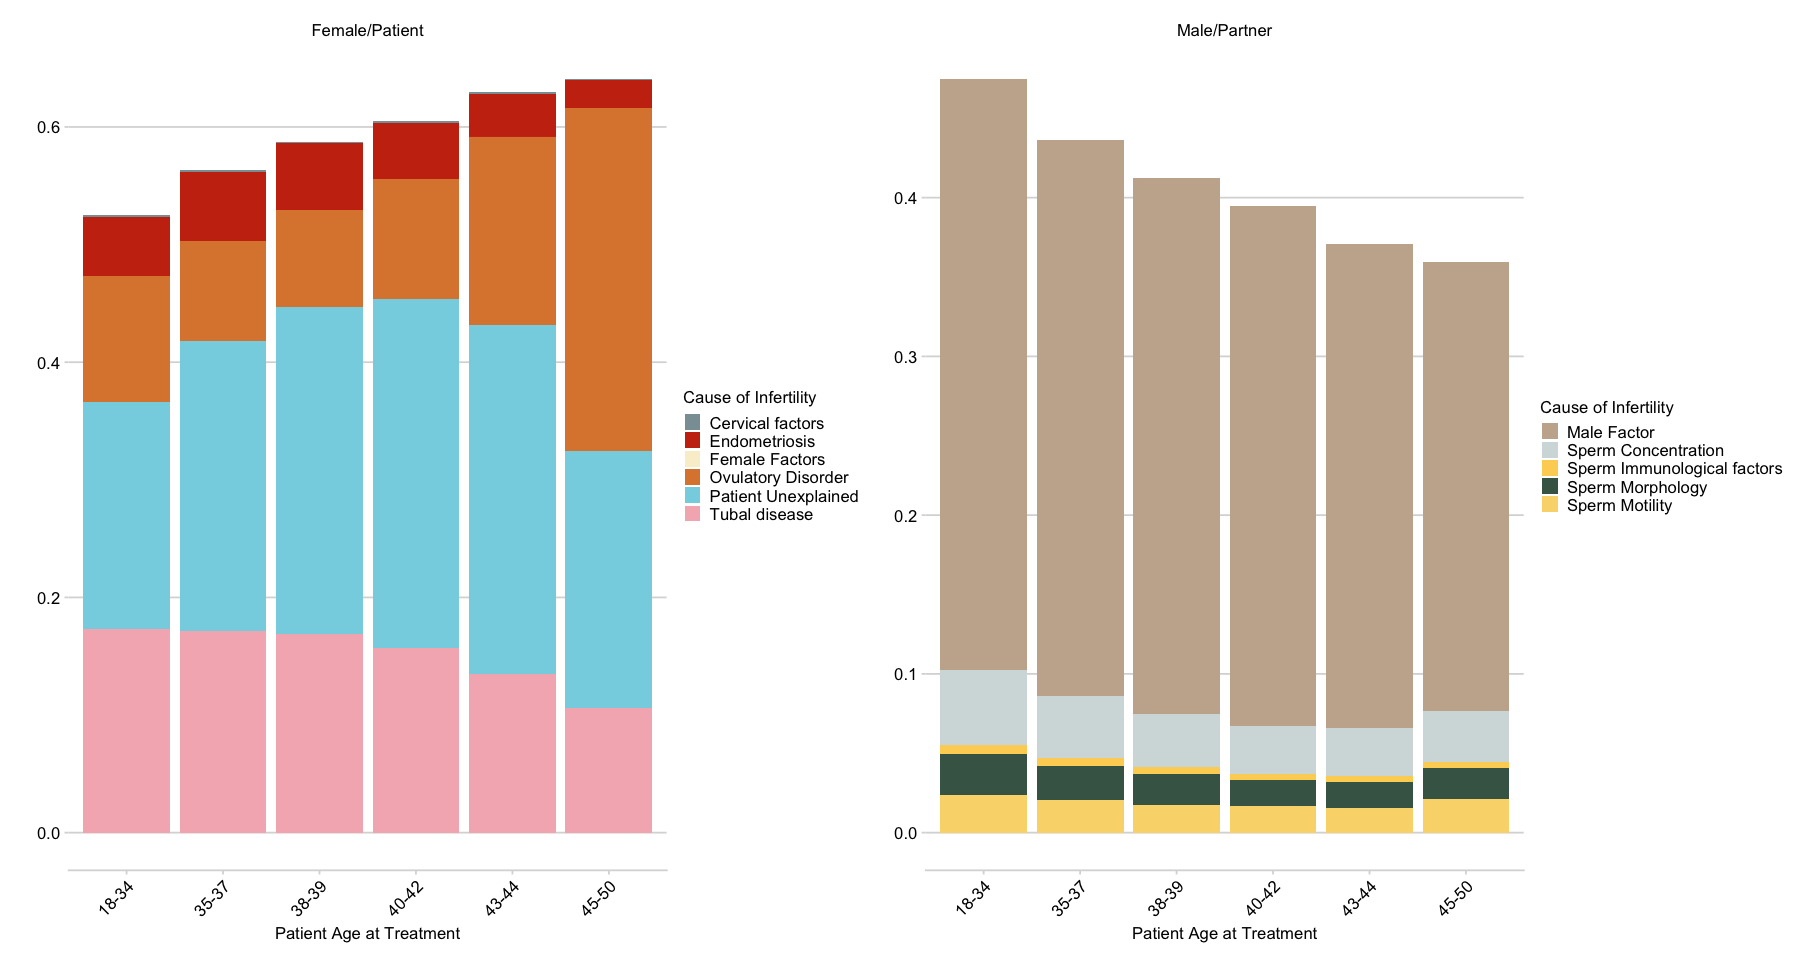

In [12]:
# repeat in percentages

subset2<-  subset2 %>%
  group_by(`Patient Age at Treatment`, cause_of_infertility) %>%         
  mutate(count = n()) %>%
  distinct() %>% 
  ungroup() 
# calulate sums per age
age_counts<-
  subset2 %>%
  select(`Patient Age at Treatment`, count) %>% 
  group_by(`Patient Age at Treatment`) %>% 
  summarize(total = sum(count)) %>%
  ungroup() %>% 
  column_to_rownames("Patient Age at Treatment") %>% 
  t() %>% as.data.frame()
print(age_counts)  

subset2<-subset2 %>% 
    mutate(age_group_percent= ifelse(`Patient Age at Treatment` == "18-34", count/age_counts$`18-34`,
                              ifelse(`Patient Age at Treatment` == "35-37", count/age_counts$`35-37`,
                              ifelse(`Patient Age at Treatment` == "38-39", count/age_counts$`38-39`,
                              ifelse(`Patient Age at Treatment` == "40-42", count/age_counts$`40-42`,
                              ifelse(`Patient Age at Treatment` == "43-44", count/age_counts$`43-44`,
                              ifelse(`Patient Age at Treatment` == "45-50", count/age_counts$`45-50`, NA)))))))



pal <- c(wes_palette("Royal1"), wes_palette("Moonrise3"), wes_palette("Chevalier1"))
p1<-subset2 %>% 
  filter(partner == "Female/Patient") %>% 
  ggplot(aes(x = `Patient Age at Treatment`,y=age_group_percent, fill = cause_of_infertility)) + 
    geom_col()+
    theme_minimal_hgrid(10, rel_small = 1)+
    scale_fill_manual(values=pal)+
    facet_wrap(~partner, nrow=1)+
    theme(legend.position = "right")+
    labs(fill = "Cause of Infertility", y="")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p2<-subset2 %>% 
  filter(partner == "Male/Partner") %>% 
  ggplot(aes(x = `Patient Age at Treatment`, y=age_group_percent,fill = cause_of_infertility)) + 
    geom_col()+
    theme_minimal_hgrid(10, rel_small = 1)+
    scale_fill_manual(values=rev(pal))+
    facet_wrap(~partner, nrow=1)+
    theme(legend.position = "right")+
    labs(fill = "Cause of Infertility", y="")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

px<-(p1 + p2)
px

### Exploring types of treatments

In [13]:

subset3 <- full_data %>% 
  select("Patient Age at Treatment", 
         "Year of Treatment", "years",
          "Type of treatment - IVF or DI" , "Specific treatment type", 
          "Egg Source" , "Sperm From" ,
          "Donated embryo" , "Patient acting as Surrogate") 

subset3 %>% count(`Type of treatment - IVF or DI`)
subset3 %>% count(`Specific treatment type`) %>%  arrange(desc(n))

Type of treatment - IVF or DI,n
<chr>,<int>
DI,240551
IVF,1135903


Specific treatment type,n
<chr>,<int>
IVF,598397
ICSI,384495
Generic DI,141811
Unknown,93984
IUI,83752
MICROMANIPULATION,35734
ICI,14185
ICSI / BLASTOCYST,4110
ICSI:ICSI,3453



* **IVF (In Vitro Fertilisation)** - An egg being fertilised by sperm outside the body.

* **DI (Donor Insemination)** - Using sperm from a sperm donor in order to get pregnant. This can be used in IUI, but also IVF and other fertility treatment options.

* **ICSI (Intracytoplasmic Sperm Injection)** - When a lone, high-quality sperm is injected straight into your egg during IVF, rather than allowing the sperm and egg to find one another in the dish.


In [14]:
subset3 %>% pull(`Specific treatment type`) %>% unique()

subset3_tidy <-  subset3 %>% 
  mutate(`Specific treatment type` = str_replace_all(`Specific treatment type`, " / ", ":")) %>% 
  mutate(`Specific treatment type` = str_replace(`Specific treatment type`, "\\+", ":")) %>% 
  mutate(`Specific treatment type` = str_replace_all(`Specific treatment type`, ":Unknown", "")) %>% 
  mutate(`Specific treatment type` = str_replace_all(`Specific treatment type`, " ", "")) %>% 
  mutate(`Specific treatment type` = ifelse(is.na(`Specific treatment type`), "Unknown", `Specific treatment type`)) %>% 
  separate(`Specific treatment type`, into=c("main_treatment"), sep=":", remove=F) 

subset3_tidy %>% pull(main_treatment) %>% unique()

subset3_tidy %>% count(main_treatment) %>% mutate(perc=round((n/1376454), 3)) %>% arrange(-perc)

[1] "IUI"                                 "IVI"                                
 [3] "IUI:ICI"                             "Generic DI"                         
 [5] "ICI"                                 "IVF"                                
 [7] "Unknown"                             "ICSI"                               
 [9] "ICSI / AH"                           "IVF / AH"                           
[11] "ICSI / BLASTOCYST"                   "IVF / BLASTOCYST"                   
[13] "IVF / AH:ICSI / AH"                  "ICSI:ICSI"                          
[15] "IVF:ICSI"                            "ICSI:IVF"                           
[17] "ICSI:Unknown"                        "IVF:IVF"                            
[19] "IVF:Unknown"                         "ICSI / BLASTOCYST:IVF / BLASTOCYST" 
[21] NA                                    "ICSI / BLASTOCYST :ICSI"            
[23] "ICSI / AH:Unknown"                   "ICSI / BLASTOCYST :IVF / BLASTOCYST"
[25] "GIFT"                                "MICROMANIPULATION"                  
[27] "IVF:MICROMANIPULATION"               "FER"                                
[29] "FET"                                 "GIFT+IVF"                           
[31] "FER / IVF"                           "GIFT:IVF"                           
[33] "GIFT+GIFT"                           "IVF+GIFT"                           
[35] "IVI:ICI"                             "Generic DI:GIFT"                    
[37] "SUZI"                                "FER / ICSI"                         
[39] "IVF / AH:ICSI"                       "ZIFT"                               
[41] "IVF / AH:Unknown"                    "ICSI:ICSI / AH"                     
[43] "SUZI:IVF"                            "ICSI / AH:ICSI"                     
[45] "IVF:SUZI"                            "ICSI / AH:SUZI"                     
[47] "ICSI / AH:IVF"                       "FER:ICSI"                           
[49] "SUZI:Unknown"                        "ICSI+GIFT"                          
[51] "ICSI:SUZI"                           "IVI:IUI"                            
[53] "GIFT+Unknown"                        "IVF:Unknown:Unknown:Unknown"        
[55] "IVF:IVF / BLASTOCYST"                "IVF / BLASTOCYST:IVF"               
[57] "ICSI / BLASTOCYST:IVF"               "IVF:IVF / AH"                       
[59] "GIFT+ICSI"                           "ICSI / BLASTOCYST :Unknown"         
[61] "IVF / BLASTOCYST:Unknown"

Warning message:
“Expected 1 pieces. Additional pieces discarded in 22342 rows [83, 8235, 8240, 8241, 8288, 8318, 8372, 8397, 8398, 8402, 8403, 8414, 8441, 8457, 8474, 8485, 8486, 8487, 8498, 8528, ...].”


[1] "IUI"               "IVI"               "GenericDI"        
 [4] "ICI"               "IVF"               "Unknown"          
 [7] "ICSI"              "GIFT"              "MICROMANIPULATION"
[10] "FER"               "FET"               "SUZI"             
[13] "ZIFT"

main_treatment,n,perc
<chr>,<int>,<dbl>
IVF,607129,0.441
ICSI,397830,0.289
GenericDI,141817,0.103
Unknown,94263,0.068
IUI,83814,0.061
MICROMANIPULATION,35734,0.026
ICI,14185,0.010
FER,619,0.000
FET,99,0.000


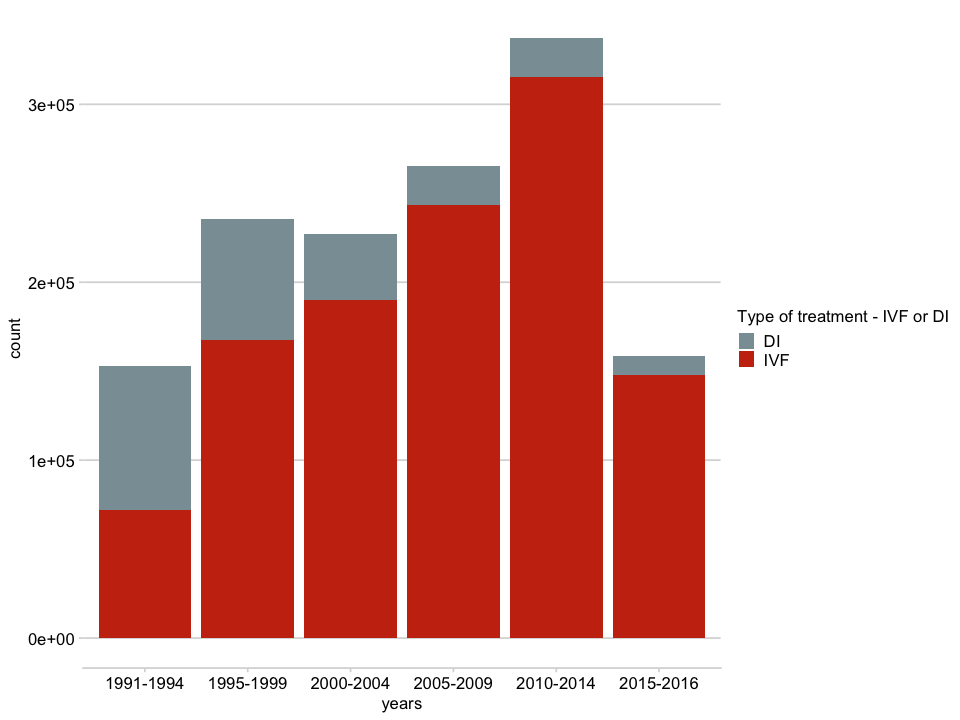

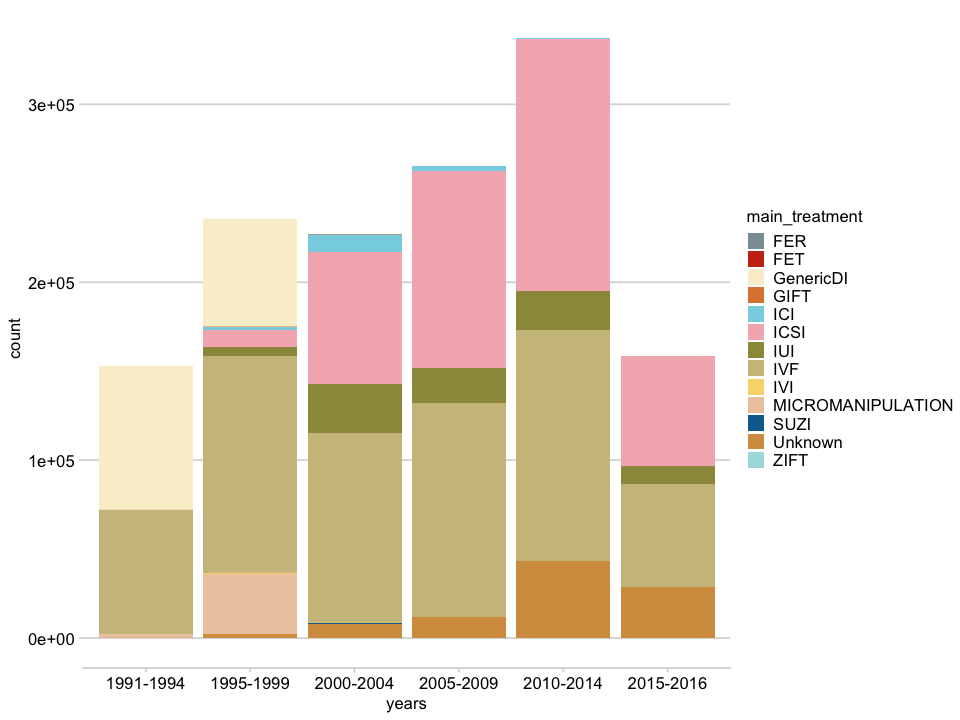

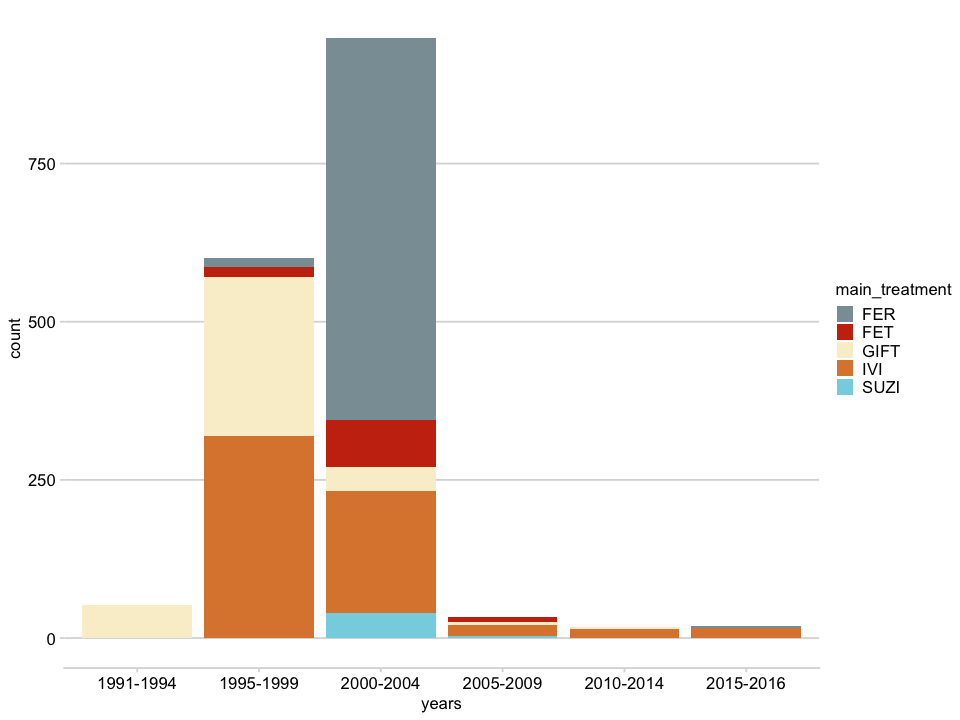

In [15]:
options(repr.plot.width=8, repr.plot.height=6)
# two main types of IVF
pal <- c(wes_palette("Royal1"), wes_palette("Moonrise3"), wes_palette("Darjeeling2"))
ggplot(subset3,aes(x = years, fill = `Type of treatment - IVF or DI`)) + 
  geom_bar()+
  theme_minimal_hgrid(10, rel_small = 1)+
  scale_fill_manual(values=pal)

# all Itreatments by year
subset3_tidy %>% 
ggplot(aes(x = years, fill = main_treatment)) + 
  geom_bar()+
  theme_minimal_hgrid(10, rel_small = 1)+
  scale_fill_manual(values=pal)


# now look only at rare treatments
subset3_tidy_sub<-subset3_tidy %>% 
  group_by(main_treatment) %>%
  filter(n()<5000) %>% 
  filter(n()>20)


ggplot(subset3_tidy_sub, aes(x = years, fill = main_treatment)) + 
  geom_bar()+
  theme_minimal_hgrid(10, rel_small = 1)+
  scale_fill_manual(values=pal)

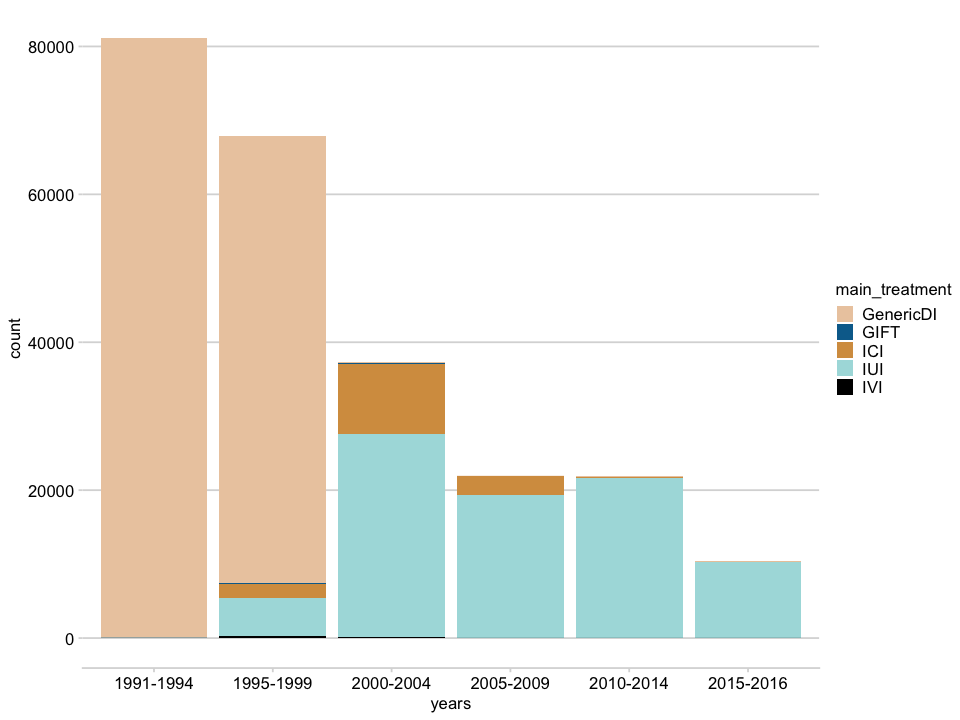

In [16]:
# looking at DI treatments
subset3_DI<-subset3_tidy %>% 
  filter(`Type of treatment - IVF or DI` == "DI") %>%
  select(main_treatment, years) %>%
  group_by(main_treatment, years) %>%
  mutate(count = n())%>%
  distinct() %>% 
  arrange(years)

pal <- c(wes_palette("Darjeeling2"))
ggplot(subset3_DI,aes(x = years, y= count,fill = main_treatment)) + 
  geom_col()+
  theme_minimal_hgrid(10, rel_small = 1)+
  scale_fill_manual(values=pal)

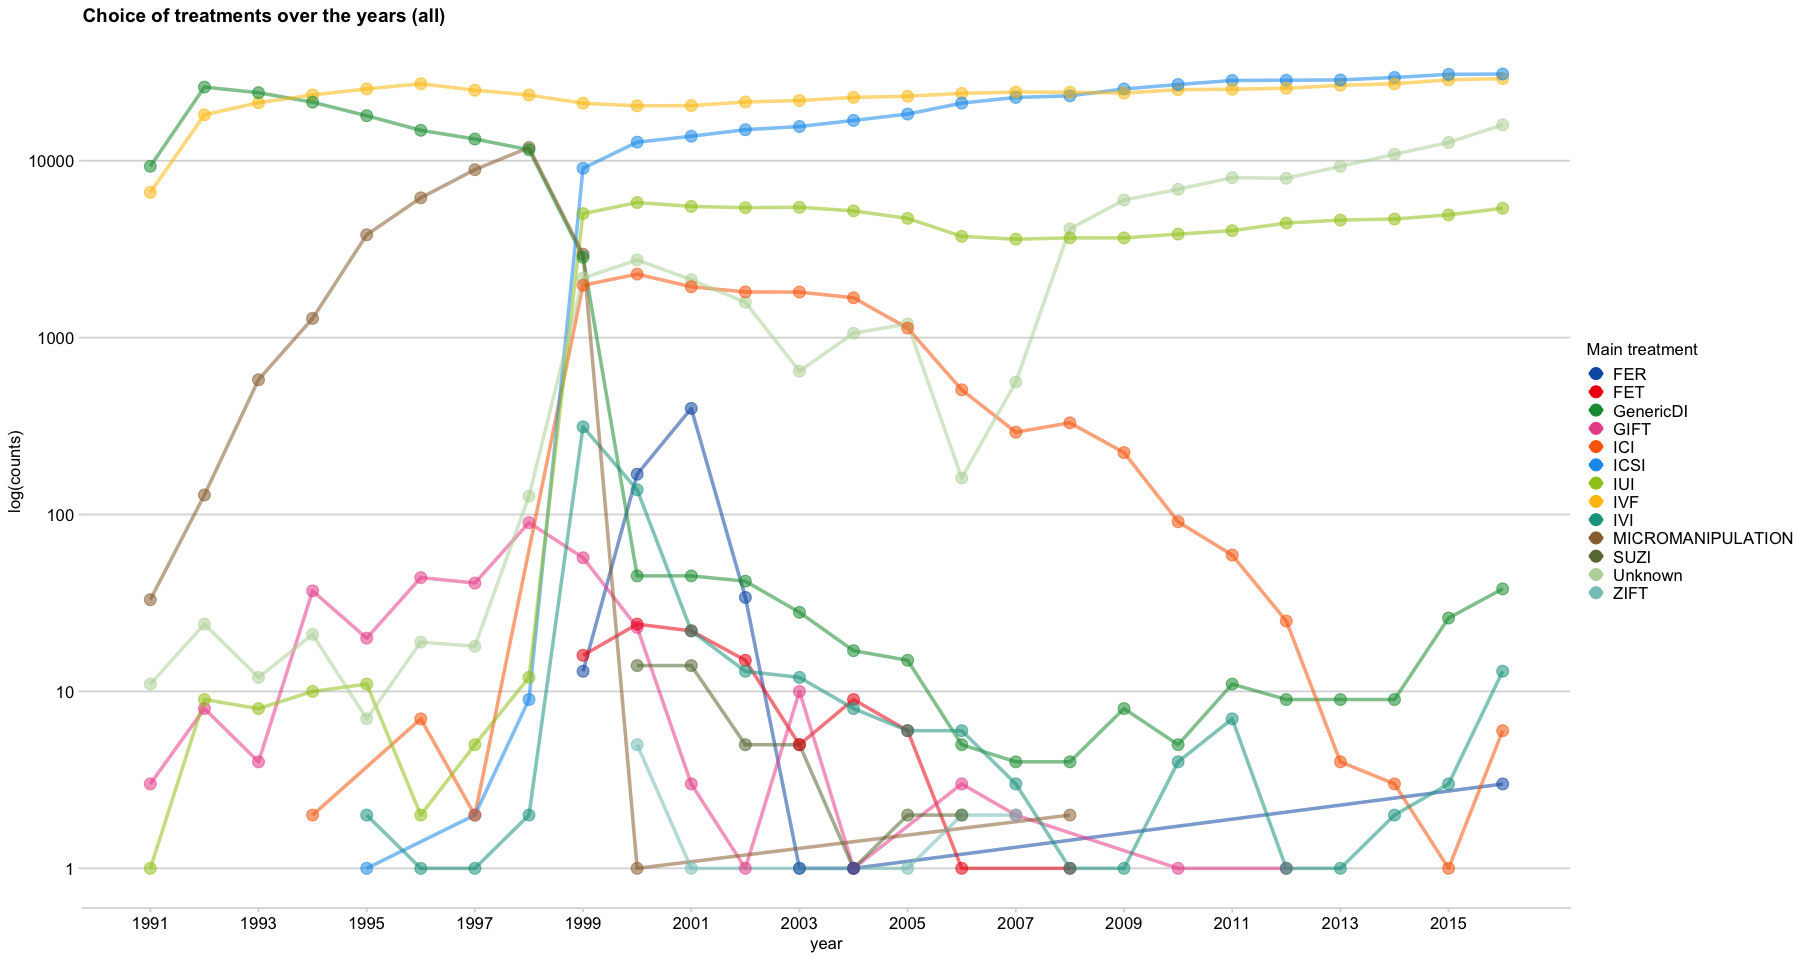

In [17]:
# finally, looking at treatment by specific years
options(repr.plot.width=15, repr.plot.height=8)
dat<-subset3_tidy %>% 
  group_by(main_treatment) %>%
  #filter(n()<5000) %>% 
  #filter(n()>20) %>% 
  ungroup %>% 
  select(main_treatment, `Year of Treatment` )  %>% 
  group_by(main_treatment, `Year of Treatment`) %>% 
  mutate(count = n())%>%
  distinct() 

pal<-c(unname(piratepal("basel")), unname(piratepal("bugs")))
pa<- ggplot(data = dat, aes(x = `Year of Treatment`  , y = count, group = main_treatment)) +
  geom_line(aes(color = main_treatment, alpha = 1), size = 1) +
  geom_point(aes(color = main_treatment, alpha = 1), size = 3) +
  scale_x_continuous(breaks = sort(unique(dat$`Year of Treatment`))[c(TRUE, FALSE)]  )+
  scale_y_log10()+
  theme(legend.position = "right") +
  scale_colour_manual(values=pal)+
  theme_minimal_hgrid(10, rel_small = 1) +
  labs(x = "year",  colour="Main treatment",
       y = "log(counts)",
       title = "Choice of treatments over the years (all)") +
  guides(alpha = FALSE)

pa

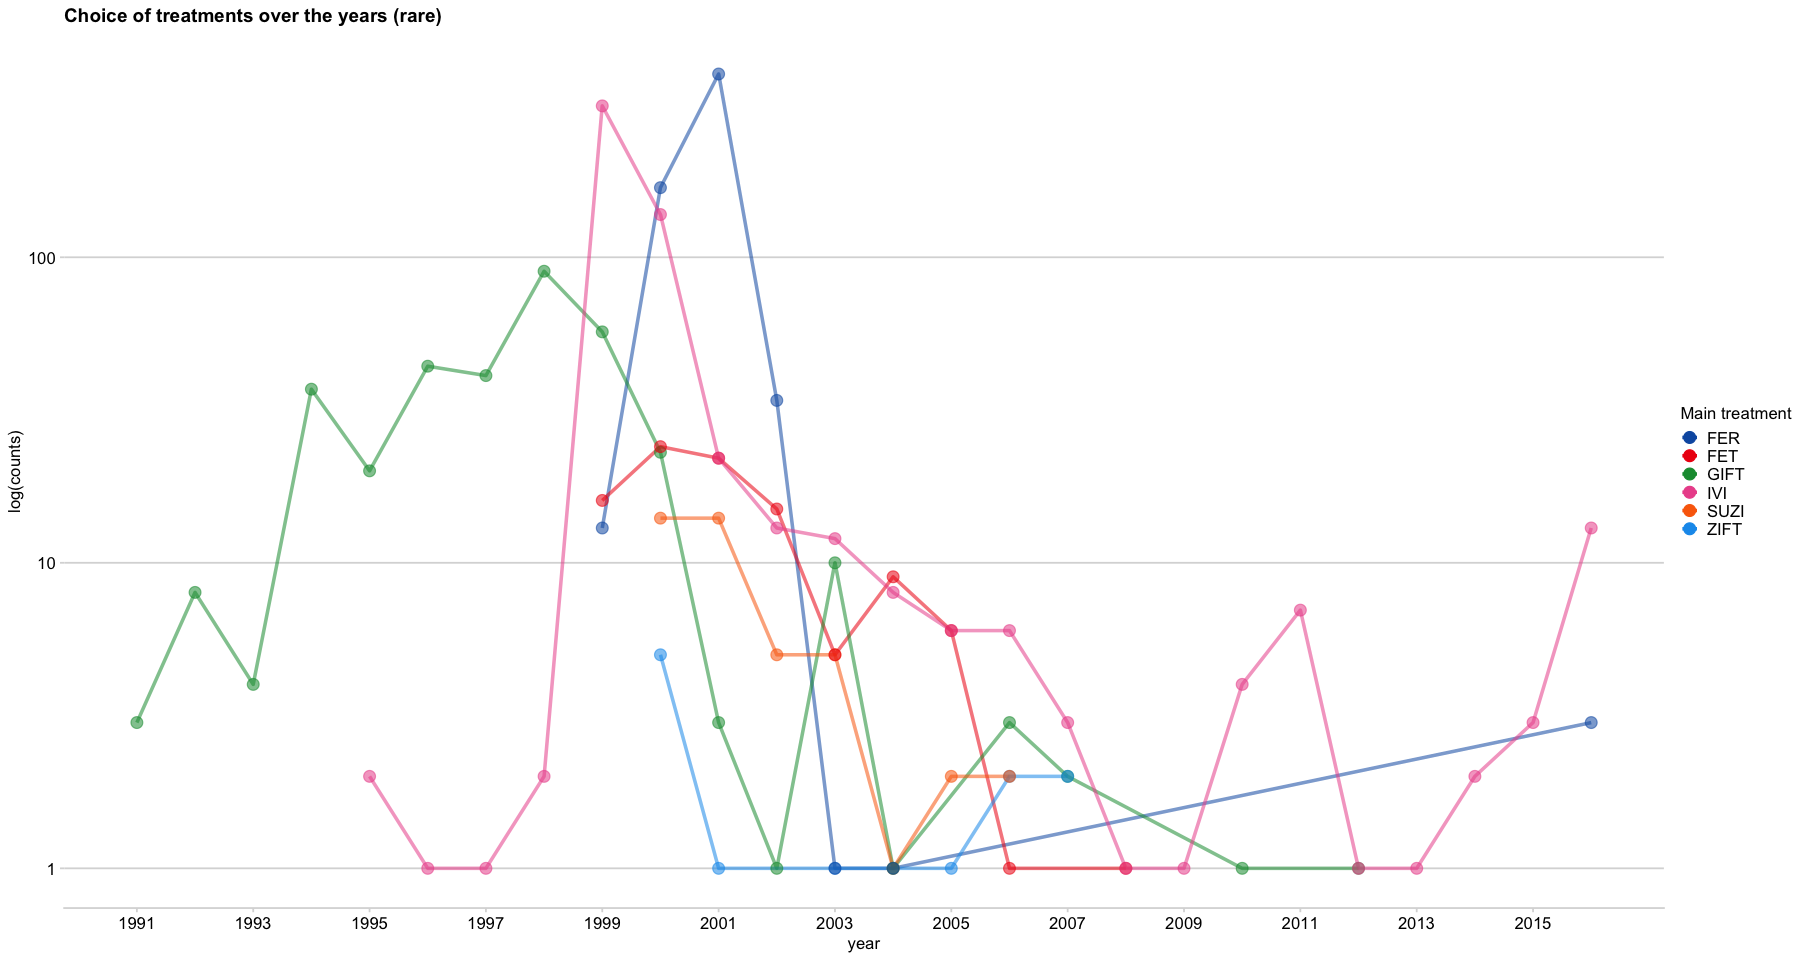

In [18]:
dat2<-subset3_tidy %>% 
  group_by(main_treatment) %>%
  filter(n()<5000) %>% 
  #filter(n()>20) %>% 
  ungroup %>% 
  select(main_treatment, `Year of Treatment` )  %>% 
  group_by(main_treatment, `Year of Treatment`) %>% 
  mutate(count = n())%>%
  distinct() 

pb <-ggplot(data = dat2, aes(x = `Year of Treatment`  , y = count, group = main_treatment)) +
  geom_line(aes(color = main_treatment, alpha = 1), size = 1) +
  geom_point(aes(color = main_treatment, alpha = 1), size = 3) +
  scale_x_continuous(breaks = sort(unique(dat$`Year of Treatment`))[c(TRUE, FALSE)]  )+
  theme(legend.position = "right") +
  scale_y_log10()+
  scale_colour_manual(values=c(pal))+
  theme_minimal_hgrid(10, rel_small = 1) +
  labs(x = "year",  colour="Main treatment",
       y = "log(counts)",
       title = "Choice of treatments over the years (rare)")+
    guides(alpha = FALSE) 
pb

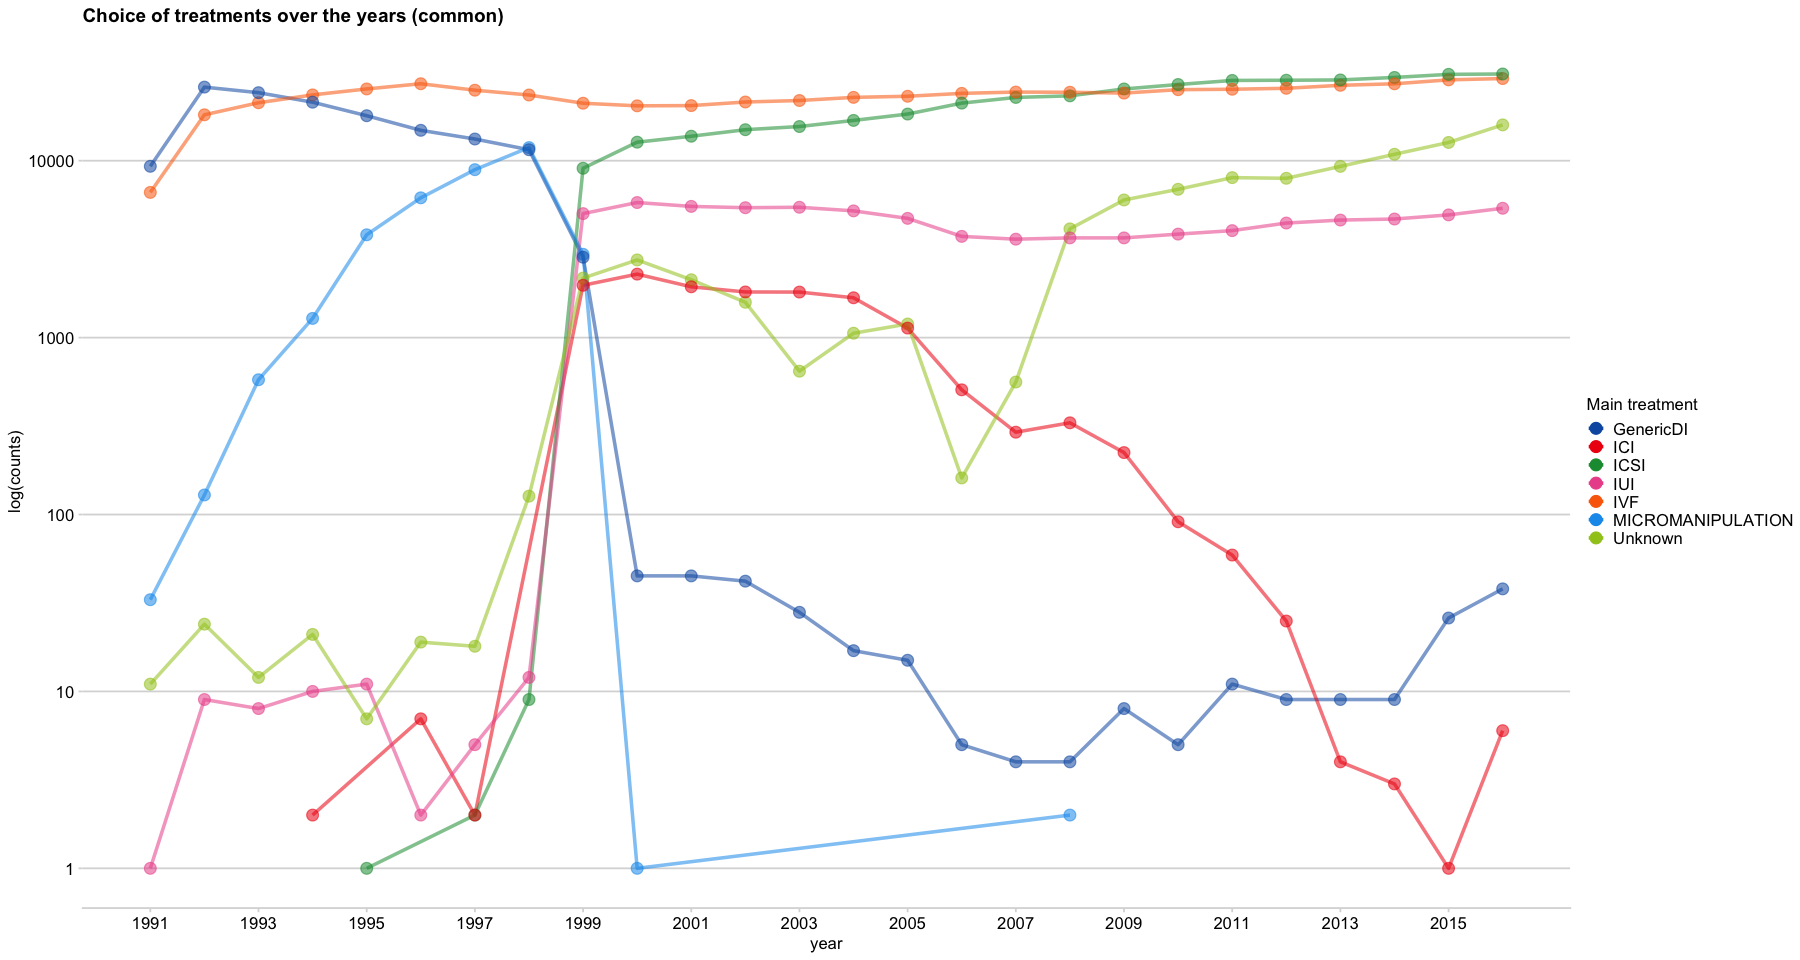

In [19]:
dat3<-subset3_tidy %>% 
  group_by(main_treatment) %>%
  filter(n()>5000) %>% 
  #filter(n()>20) %>% 
  ungroup %>% 
  select(main_treatment, `Year of Treatment` )  %>% 
  group_by(main_treatment, `Year of Treatment`) %>% 
  mutate(count = n())%>%
  distinct() 

pc <-ggplot(data = dat3, aes(x = `Year of Treatment`  , y = count, group = main_treatment)) +
  geom_line(aes(color = main_treatment, alpha = 1), size = 1) +
  geom_point(aes(color = main_treatment, alpha = 1), size = 3) +
  scale_x_continuous(breaks = sort(unique(dat$`Year of Treatment`))[c(TRUE, FALSE)]  )+
  theme(legend.position = "right") +
  scale_y_log10()+
  scale_colour_manual(values=c(pal))+
  theme_minimal_hgrid(10, rel_small = 1) +
  labs(x = "year",  colour="Main treatment",
       y = "log(counts)",
       title = "Choice of treatments over the years (common)")+
    guides(alpha = FALSE) 
pc